                        ********Spark Foundation Internship********


# ----------------------------------------------------------------------------------------

##                    Task1:     *Prediction using Supervised  Machine Learning*  
# ---------------------------------------------------------------------------------------- 

### Author: 

     NACHOUR ILHAM,Data science and business analytics intern
     
     
     
     

                    









**Task description:**


   In this regression task we will predict the percentage of marks that a student is expected to score based up on the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Importing Libraries

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

print("Modules imported successfully ")

Modules imported successfully 


# Creating a Dataframe from the .csv file

In [2]:
# Reading data from remote link
link='http://bit.ly/w-data'
df = pd.read_csv(link)
# Showing the first five rows
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exporing the dataset

In [3]:
df.shape

(25, 2)

In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
print("Number of dublicate rows :" ,df.duplicated().sum())

Number of dublicate rows : 0


# Visualizing the dataset

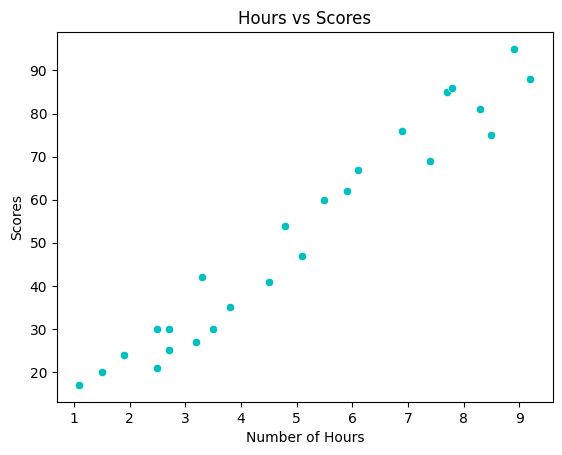

In [9]:
sns.scatterplot(x=df['Hours'],y=df['Scores'],marker='o',color='c')
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

**graph interpretation:**
From the graph above, we can clearly see that there is a positive linear relationship between hours of studying and the scores


# Preparing the data

Our goal is to predict the score. So the response variable is **Scores** and the only feature we have available is **Hours** (predictor variable).

In [10]:
X = df.Hours.values.shape
y = df.Scores.values

In [11]:
print(X)

(25,)


In [12]:
#we have to reshape Hours(predictor variable) to (-1, 1)
X = df.Hours.values.reshape(-1,1)
print(X.shape)

(25, 1)


In [13]:
#split this df into training and test sets by using Scikit-Learn's built-in train_test_split()method:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

# Training the Algorithm

In [14]:
# Implementing the linear regression model
linreg = LinearRegression()

# Fitting the data
linreg.fit(X_train, y_train)

print("Training complete.")

Training complete.


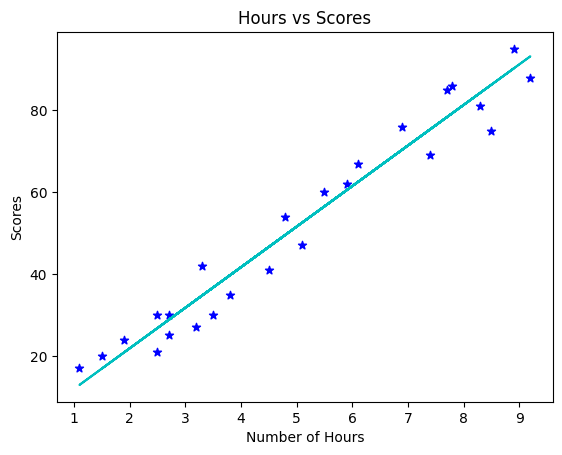

In [16]:
# Plotting the regression line
#y=mx+c
eq = linreg.coef_ * X + linreg.intercept_  

# Plotting for the test data
plt.scatter(X, y,marker='*',color='b')
plt.plot(X, eq, color='c')
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

# Evaluating The Model

In [17]:
# We will predict from the validation data
y_pred = linreg.predict(X_test) 

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
r_squared = linreg.score(X_test, y_test) 
print("R-Squared = ",r_squared )
print("RMSE = ", mean_squared_error(y_test, y_pred, squared=False))
print("Mean Absolute error :" ,mean_absolute_error(y_test, y_pred) )

R-Squared =  0.9454906892105355
RMSE =  4.647447612100367
Mean Absolute error : 4.183859899002975


# Making Predictions

**Let's answer the question: What will be predicted score if a student studies 9.25 hour/day?**

In [19]:
# Predicting
hours=9.25
prediction = linreg.predict(np.array([[hours]]))

# Printing the result
print(f'The score predicted for 9.25 Hours is {prediction[0]:.2f}')

The score predicted for 9.25 Hours is 93.69
